In [1]:
import pandas as pd
import numpy as np

In [2]:
frame = pd.read_csv('single_mutants.csv', index_col=1, header=1)
frame['Fitness'] = np.log(frame['Selection Count']/frame['Input Count'])
del frame['Selection Count'], frame['Input Count']

In [3]:
aa = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
heatmap = np.empty((20, 55))
heatmap[:] = np.nan

In [6]:
for i in range(len(frame)):
    heatmap[aa.index(frame.iloc[i, 1]), frame.index[i]-2] = frame.iloc[i, 2]
for i in range(len(frame)):
    heatmap[aa.index(frame.iloc[i, 0]), frame.index[i]-2] = 1

In [7]:
diffs = np.empty((20, 20))
diffs[:] = np.nan

In [8]:
for i in range(20):
    for j in range(i):
        diffs[i, j] = np.sum((heatmap[i, :] - heatmap[j, :]) ** 2)

In [9]:
to_plot = []
values = np.sort(diffs.reshape(1, 400))
for i in values[0,]:
    if not np.isnan(i):
        to_plot.append(i)
        print(aa[np.where(diffs==i)[0][0]] + ' ' + aa[np.where(diffs==i)[1][0]] + ' ' + str(i))

S A 14.6448372863
C A 15.7658229945
V I 16.1830049613
T S 16.4642795005
S C 18.8880657167
R K 19.1502888531
V C 19.504866642
V M 24.8973792674
M I 25.3313909919
L I 25.8962669259
M L 26.9725486321
V T 27.5129868437
T C 29.3075480804
Q H 29.5102687805
Y H 29.8123076634
M C 31.1628314534
T I 33.7076754465
Y F 34.909946086
V L 35.4886854159
L F 37.3997983578
V A 37.704543867
V S 37.8131900386
T A 39.7860611084
I C 40.0622870327
T Q 40.9767573639
Q I 44.5687886914
G A 44.6772265584
Q N 46.3963519953
N H 50.2635735649
S G 50.9488172342
M F 52.7331055037
T M 54.6336610644
E D 55.8716779601
V Q 55.9069412271
S Q 56.5244232263
S I 56.8056729617
L H 57.0669076111
Y W 57.507636695
I H 57.6693047944
T N 58.455216251
L C 58.8885774036
S M 58.8967356955
M A 59.493244599
H F 59.9380557334
W H 62.4851298104
Y L 62.8719798864
G C 64.160443122
R Q 64.359505373
I F 65.0898124004
S N 65.3510648621
Y M 66.0722881371
Y I 67.0716761666
Y Q 67.6926183899
Q L 68.4252491991
Q M 69.3746830601
M H 70.5830646561


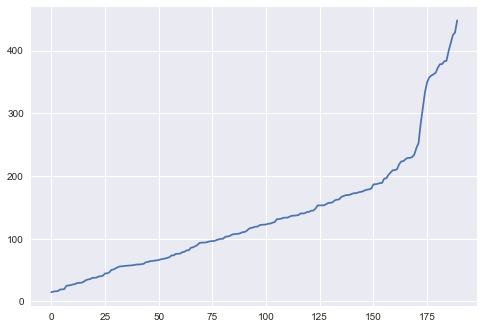

In [10]:
plt.plot(to_plot)
plt.savefig('aa_plot.png', dpi=300)
plt.show()

In [11]:
sns.set_style({'axes.grid': False})

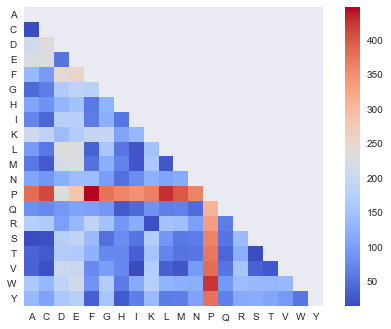

In [12]:
plt.imshow(diffs, cmap='coolwarm')
plt.yticks(np.arange(0, 20), aa)
plt.xticks(np.arange(0, 20), aa)
plt.colorbar()
plt.savefig('aa_correlation.png', dpi=300)
plt.show()

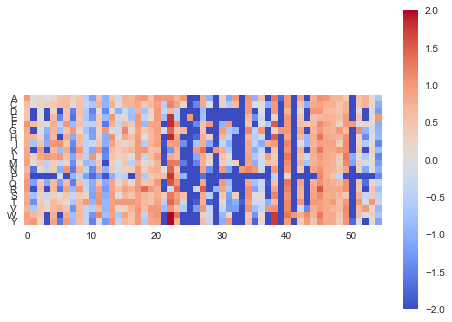

In [13]:
plt.imshow(heatmap, cmap='coolwarm', vmin=-2, vmax=2)
plt.savefig('scan.png', dpi=300)
plt.yticks(np.arange(0, 20), aa)
plt.colorbar()
plt.show()